<a href="https://colab.research.google.com/github/Erika2397/Bootcamp_Alura_Data_Science/blob/main/An%C3%A1lise_descritiva_e_testes_estat%C3%ADsticos_(Module_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Educação, saúde e tipos de dados**

## Lendo dados compactados

In [ ]:
import pandas as pd
from zipfile import ZipFile

In [ ]:
caminho = "/content/drive/MyDrive/Bootcamp Alura/Módulo 3/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep=';', thousands='.', decimal=',')

In [ ]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


## Tipo de Dados

In [ ]:
# Olhando linhas e colunas do DataFrame
dados.shape

(16556, 181)

In [ ]:
# Olhando as colunas do DataFrame
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [ ]:
# Quais são os tipos de dados do DataFrame
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
# Vendo os tipos de dados 'object'
dados.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


## Dados Qualitativos e Tabelas de frequencia

In [ ]:
# Vendo a pergunta VB01001 em frequencia
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [ ]:
# Colocando em porcentagem
dados['VB01001'].value_counts(normalize = True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [ ]:
# Vendo se os estudantes se sentes satisfeitos com corpos deles
frequencia = dados['VB11007'].value_counts()

In [ ]:
percentual = dados['VB11007'].value_counts(normalize = True)*100

In [ ]:
# Criando um dicionário para colocar os nomes das opções de respostas
respostas = {
    1 : 'Muito Satisfeito(a)',
    2 : 'Satisfeito(a)',
    3 : 'Indiferente',
    4 : 'Insatisfeito(a)',
    5 : 'Muito Insatisfeito(a)',
    99 : 'Não Informado',
}

In [ ]:
# Criando um dataframe de frequencia e percentual
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
dist_freq.rename(index=respostas, inplace=True)
dist_freq.rename_axis('Sentimento do(a) estudante em relação ao seu corpo', axis=1, inplace=True)
dist_freq

Sentimento do(a) estudante em relação ao seu corpo,Frequência,Percentual
Satisfeito(a),6920,41.797536
Muito Satisfeito(a),4608,27.832810
Insatisfeito(a),2326,14.049287
Indiferente,1807,10.914472
Muito Insatisfeito(a),714,4.312636
Não Informado,181,1.093259


## Frequência em dados continuos e pandas CrossTab

**Dados quantitativos e tabelas de frequência:**

In [ ]:
# Criando a variavel de IMC
dados['IMC'] = dados['VB17003'] / ((dados['VB17004'] / 100)**2)
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [ ]:
# Criando a lista classes e labels
classes = [0, 18.5, 25, 30, 60]
labels = ['abaixo', 'normal', 'sobrepeso', 'obesidade']
dados['CLASSE_IMC'] = pd.cut( x = dados['IMC'],
       bins = classes,
       labels = labels,
       include_lowest = True )
dados[['IMC', 'CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [ ]:
# Mostrando frequencia e Percentual de acordo a clasificação de IMC
frequencia = dados["CLASSE_IMC"].value_counts()
percentual = dados["CLASSE_IMC"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
#dist_freq.rename(index = respostas, inplace = True)
dist_freq.rename_axis("Clasificação do IMC", axis=1, inplace = True)
dist_freq

Clasificação do IMC,Frequência,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


**Regra de Sturges e Crosstab**

In [ ]:
# Vendo o valor minimo e máximo da pergunta de altura
print('O valor minimo da altura é: {}'.format(dados["VB17004"].min()))
print('O valor máximo da altura é: {}'.format(dados["VB17004"].max()))

O valor minimo da altura é: 124.1
O valor máximo da altura é: 195.3


In [ ]:
# Usando a regra de Sturges (ler documentação) / criar labels
import numpy as np
tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
dados["CLASSE_ALTURA"] = pd.cut(x = dados["VB17004"],
       bins = k,
       include_lowest = True)

frequencia = dados["CLASSE_ALTURA"].value_counts()
percentual = dados["CLASSE_ALTURA"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [ ]:
# Usando o Crosstab para saber se a pessoa está ou não satisfeita com seu corpo de acordo ao sexo da pessoa
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito(a),32.363944,23.291813
Satisfeito(a),42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito(a),9.484735,18.623776
Muito Insatisfeito(a),3.137444,5.490386
Não Informado,1.435984,0.749788


In [ ]:
# Usando agora pelas linhas 
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "index") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito(a),58.203125,41.796875
Satisfeito(a),50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito(a),33.791917,66.208083
Muito Insatisfeito(a),36.414566,63.585434
Não Informado,65.745856,34.254144


## Histograma e Boxplot

**Histogramas e Distribuições**

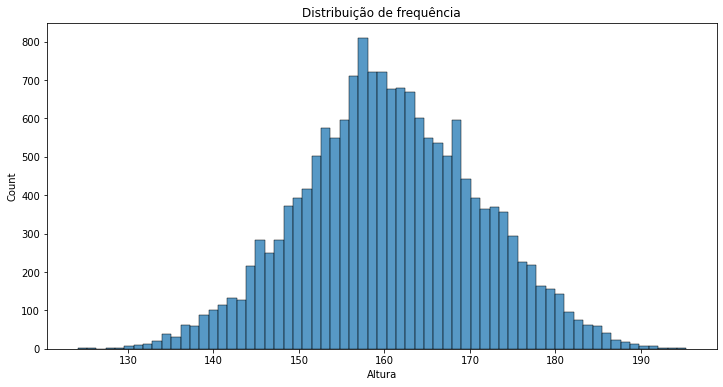

In [ ]:
# Importando seaborn 
import seaborn as sns

ax = sns.histplot(x='VB17004', data=dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax=ax

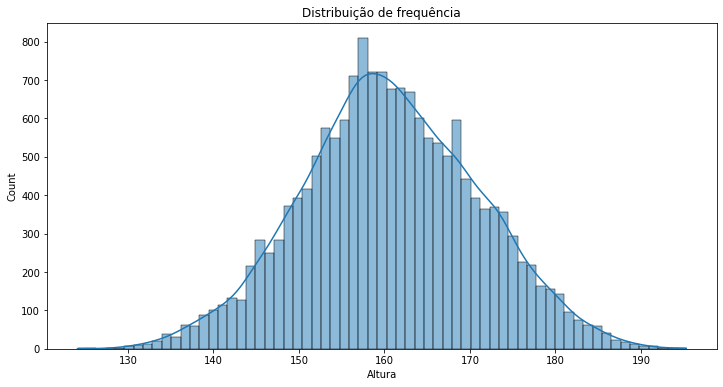

In [ ]:
# Olhando na distribuição com uma curva 
ax = sns.histplot(x='VB17004', data=dados, kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax=ax

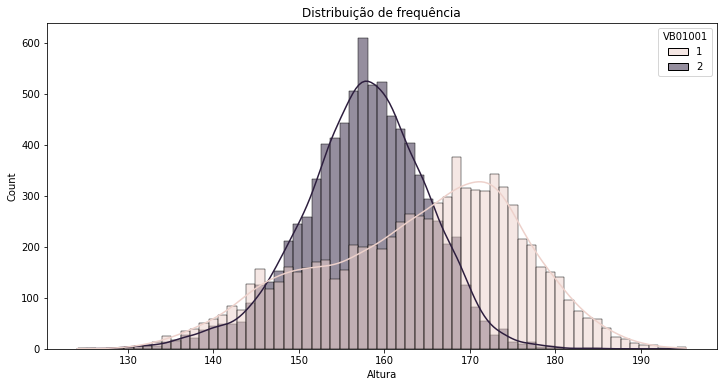

In [ ]:
# Plotando Altura e Sexo dos estudantes
ax = sns.histplot(x = "VB17004", data = dados, kde = True, hue = "VB01001")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax=ax

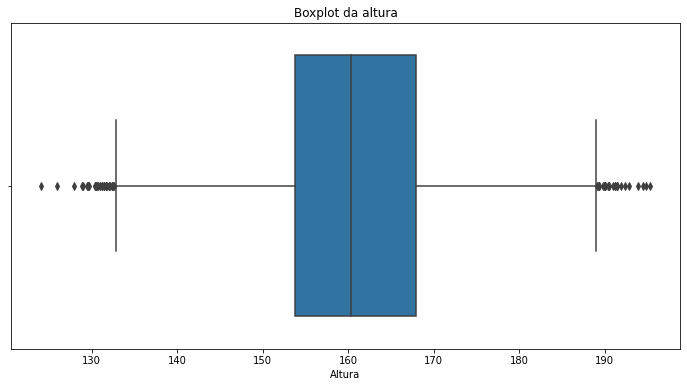

In [ ]:
# Importando bibliotecta
import matplotlib.pyplot as plt

# Usando boxplot
ax = sns.boxplot(x='VB17004', data= dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Altura")
ax;

In [ ]:
# Olhando os dados estatistisco da altura
dados['VB17004'].describe()

count    16556.000000
mean       160.713113
std         10.340070
min        124.100000
25%        153.800000
50%        160.400000
75%        167.900000
max        195.300000
Name: VB17004, dtype: float64

In [ ]:
# Olhando o primeiro quantile 25%
dados['VB17004'].quantile(0.25)

153.8

In [ ]:
# Olhando para o segundo quantile 50%
dados['VB17004'].quantile(0.5)

160.4

In [ ]:
# Olhando para o terceiro quantile 75%
dados['VB17004'].quantile(0.75)

167.9

In [ ]:
# Vendo o valor minimo
dados['VB17004'].min()

124.1

In [ ]:
# Vendo o valor maximo
dados['VB17004'].max()

195.3

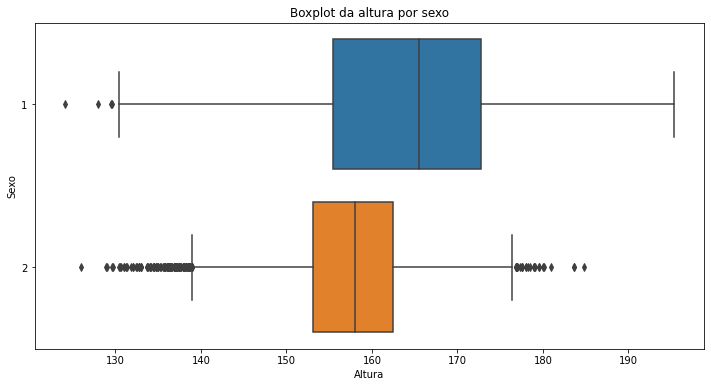

In [ ]:
# Plotando de acordo ao sexo da pessoa
ax = sns.boxplot(x='VB17004', y='VB01001', data= dados, orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura por sexo")
ax.set_xlabel("Altura")
ax.set_ylabel("Sexo")
ax;

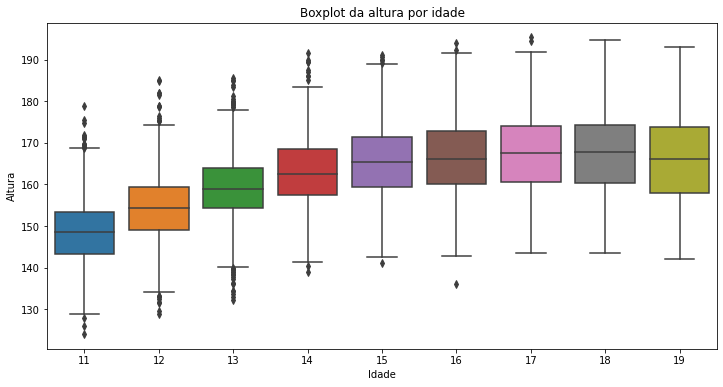

In [ ]:
# Plotando de acordo a idade 
ax = sns.boxplot(x='VB01003', y='VB17004', data= dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura por idade")
ax.set_xlabel("Idade")
ax.set_ylabel('Altura')
ax;

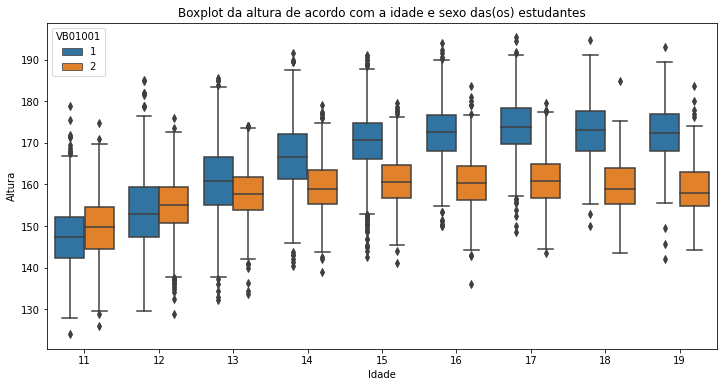

In [ ]:
# Plotando de acordo idade e sexo
ax = sns.boxplot(x='VB01003', y='VB17004', hue='VB01001', data= dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura de acordo com a idade e sexo das(os) estudantes")
ax.set_xlabel("Idade")
ax.set_ylabel("Altura")
ax;

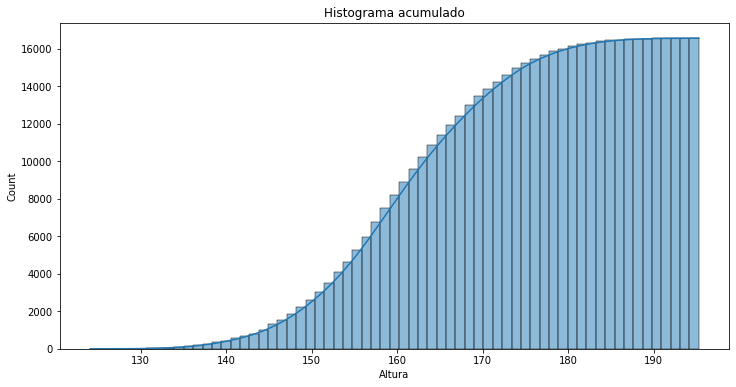

In [ ]:
# Usando o historgrama
ax = sns.histplot(x='VB17004', data=dados, kde=True, cumulative=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma acumulado')
ax.set_xlabel('Altura')
ax=ax

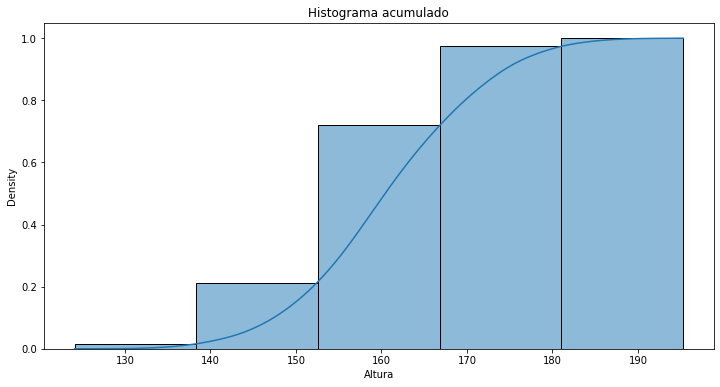

In [ ]:
# Alterando o historgrama para ficar com stats
ax = sns.histplot(x='VB17004', data=dados, kde=True, cumulative=True, stat='density', bins=5)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma acumulado')
ax.set_xlabel('Altura')
ax=ax

## Medida de centralidade e dispersão

**Medida de centralidade**

In [ ]:
# Calculando a média da altura
dados['VB17004'].mean()

160.71311307078818

In [ ]:
# Calculando a média da altura de acordo ao sexo dos estudantes
dados.groupby('VB01001')['VB17004'].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [ ]:
# Calculando a média agrupando sexo e idade de acordo a altura dos estudantes
dados.groupby(['VB01001', 'VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

**Desvio padrão passo a passo**

In [ ]:
media_altura =  dados["VB17004"].mean()
dados["MEDIA_ALTURA"] = media_altura
diferenca_das_media = dados["VB17004"] - media_altura
dados["DIFERENCA_MEDIA"] = diferenca_das_media

diferenca_quadrado = diferenca_das_media**2
dados["DIFERENCA_QUADRADO"] = diferenca_quadrado

dados[["VB17004", "MEDIA_ALTURA", "DIFERENCA_MEDIA", "DIFERENCA_QUADRADO"]]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [ ]:
# Calculando a variancia amostral
variancia_amostral = (1/(len(dados)-1)) * dados["DIFERENCA_QUADRADO"].sum()
variancia_amostral

106.91705244049119

In [ ]:
# Calculando desvio padrão
desvio_padrao = np.sqrt(variancia_amostral)
desvio_padrao

10.340070233827776

## Intervalo de confiança e testes

**Intervalo de confiança**

In [ ]:
# Usando zconfint
from statsmodels.stats.weightstats import zconfint

zconfint(dados["VB17004"].to_list())

(160.5556082427712, 160.87061789880892)

In [ ]:
#Usando ttest
from statsmodels.stats.weightstats import DescrStatsW

descricao_altura = DescrStatsW(dados["VB17004"])
descricao_altura.tconfint_mean()

(160.55559672649298, 160.8706294150872)

**Testes estatisticos**

In [ ]:
from statsmodels.stats.weightstats import ztest

distribuicao_altura_m = dados.query("VB01001 == 1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001 == 2")["VB17004"]

_ , p_value = ztest(distribuicao_altura_m, distribuicao_altura_f) 
p_value

0.0

In [ ]:
from scipy.stats import normaltest

_ , p_value_normaltests_m = normaltest(distribuicao_altura_m)
_ , p_value_normaltests_f = normaltest(distribuicao_altura_f)

In [ ]:
print(p_value_normaltests_m, p_value_normaltests_f)

7.695118853996524e-75 7.125189471020874e-47


In [ ]:
from scipy.stats import ranksums

ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)